In [1]:
import pandas as pd
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix  

In [2]:
data = pd.read_csv('Social_Network_Ads.csv')
print(data)

      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
5    15728773    Male   27            58000          0
6    15598044  Female   27            84000          0
7    15694829  Female   32           150000          1
8    15600575    Male   25            33000          0
9    15727311  Female   35            65000          0
10   15570769  Female   26            80000          0
11   15606274  Female   26            52000          0
12   15746139    Male   20            86000          0
13   15704987    Male   32            18000          0
14   15628972    Male   18            82000          0
15   15697686    Male   29            80000          0
16   15733883    Male   47            25000          1
17   15617

In [3]:
X = data.iloc[:,[2,3]].values
Y = data.iloc[:,4].values

In [4]:
# split the dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [48]:
# perform feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

In [11]:
# Fitting logistic regression to the training ser
transformed = LogisticRegression(random_state = 0, solver = 'liblinear')
transformed.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [12]:
# Predicting the results
y_pred = transformed.predict(X_test)

In [13]:
# Evaluate the performance of logistic regression using confusion matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

[[63  5]
 [ 7 25]]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


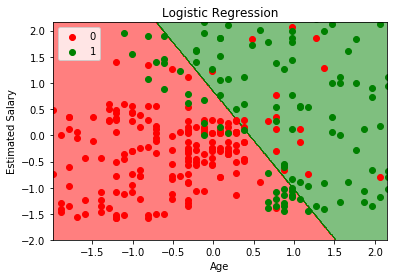

In [46]:
# Visualising the training set results
# logistic regression is a linear classifier
X1, X2 = np.meshgrid(np.arange(start = X_train[:,0].min(), stop = X_train[:,0].max(), step = 0.01),
                     np.arange(start = X_train[:,0].min(), stop = X_train[:,0].max(), step = 0.01))
plt.contourf(X1, X2, transformed.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape), alpha = 0.5, cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_train)):
    plt.scatter(X_train[Y_train == j, 0], X_train[Y_train == j, 1], c= ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend() 
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


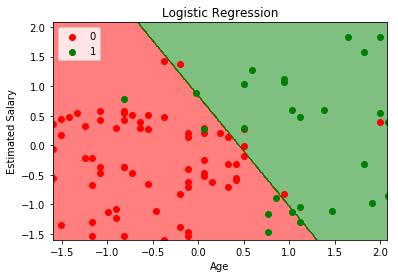

In [49]:
# Visualising the test set results
X1, X2 = np.meshgrid(np.arange(start = X_test[:,0].min(), stop = X_test[:,0].max(), step = 0.01),
                     np.arange(start = X_test[:,0].min(), stop = X_test[:,0].max(), step = 0.01))
plt.contourf(X1, X2, transformed.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape), alpha = 0.5, cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_train)):
    plt.scatter(X_test[Y_test == j, 0], X_test[Y_test == j, 1], c= ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()